In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [46]:
from matplotlib import font_manager, rc
import matplotlib
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc("font", family = font_name)

- 데이터 정제 : 비정상 데이터의 처리
  - 결측치 : 빈값(Null)
    - 결측치 삭제(소거법)
      - 유의미한 데이터가 소실될 수 있음
    - 결측치 대체(고정값 or 산술)
  - 이상치 : 정상 범위를 벗어난 값
    - 이상치를 감지하는 수식 확인
    - 분석가의 주관으로 최종 판단

- 결측치 대체
  - 평균 대치법 : 데이터의 평균으로 대치
  - 다중 대치법 : 결측치 하나하나에 대하여 평균 대치법을 하고 변하는 평균값을 다른 결측치에 대체하는 방식으로 대체 진행

- 이상치
  - 분석의 목적이나 종류에 따라 분석가의 적절한 판단이 필요
  - 잘못 입력, 분석목적에 부합하지 않는 데이터, 의도하거나 의도되지 않은 이상값

- 이상치의 판단
  - 논리적 판단 : 일반적인 범위를 벗어나는 값을 이상치로 간주
    - 단, 학술적으로 검증된 출처 표기가 필요(논문, 학계 공식 발표 등)
  - 통계적 기준을 이용(ESD) : 상하위 0.3% or +-표준편차*3
  - 상자그림(boxplot) 이용
    - IQR : Q3 - Q1
    - Q1 - 1.5IQR보다 작거나 Q3 + 1.5IQR보다 크다면 이상치로 간주

In [15]:
df = pd.DataFrame([[1, None, 10],
                  [5, 5, 5],
                  [None, 0, 10]])

In [20]:
df

,0,1,2
0,1.0,NaN,10
1,5.0,5.0,5
2,NaN,0.0,10


In [22]:
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [23]:
df_imr = imr.fit_transform(df)

In [24]:
df_imr

array([[ 1. ,  2.5, 10. ],
       [ 5. ,  5. ,  5. ],
       [ 3. ,  0. , 10. ]])

In [37]:
origin = pd.read_excel('ref_sample.xlsx', index_col = '이름')

In [30]:
origin.isnull().sum()

이름    0
국어    1
영어    0
수학    1
과학    2
dtype: int64

In [33]:
origin

,이름,국어,영어,수학,과학
0,철수,98.0,77,88.0,64.0
1,영희,88.0,120,62.0,72.0
2,민철,NaN,70,83.0,79.0
3,수현,63.0,60,31.0,71.0
4,호영,75.0,50,90.0,NaN
5,영호,80.0,88,91.0,72.0
6,용식,82.0,88,NaN,90.0
7,나영,90.0,92,81.0,NaN
8,석영,91.0,90,89.0,80.0


In [35]:
imr1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imr2 = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [40]:
df1 = pd.DataFrame(imr1.fit_transform(origin), index = origin.index, columns = origin.columns)
df2 = pd.DataFrame(imr2.fit_transform(origin), index = origin.index, columns = origin.columns)

In [41]:
df1

,국어,영어,수학,과학
이름,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


In [42]:
df2

,국어,영어,수학,과학
이름,,,,
철수,98.0,77.0,88.0,64.0
영희,88.0,120.0,62.0,72.0
민철,85.0,70.0,83.0,79.0
수현,63.0,60.0,31.0,71.0
호영,75.0,50.0,90.0,72.0
영호,80.0,88.0,91.0,72.0
용식,82.0,88.0,85.5,90.0
나영,90.0,92.0,81.0,72.0
석영,91.0,90.0,89.0,80.0


<AxesSubplot: >

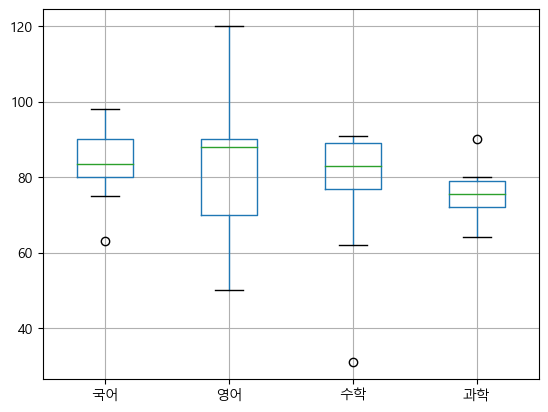

In [47]:
df1.boxplot()

- 네모 상자는 정상범위, 변수에 동그라미가 있을 경우 이상치임을 의미함

1. 상자그림을 통해 검출된 국어, 수학 과학 점수
2. 분석가의 주관에 따른 영어 점수 (100점 초과)
   - 점수가 아무리 낮아도 정상 범위(0~100)라면 답안지를 밀려썼거나 시험 중 실수가 있을 수도 있음
   - 정상 범위를 벗어난 경우면 채점에 오류가 있을수 있음

In [48]:
df1.loc[df1['영어'] > 100, '영어'] = np.nan
df1.isna().sum()

국어    0
영어    1
수학    0
과학    0
dtype: int64

In [50]:
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df1_2 = pd.DataFrame(imr.fit_transform(df1), columns = df1.columns, index = df1.index)

- 극단치 경계값 계산
  - 4분위수 : 데이터 표본을 4개의 동일한 부분으로 나누는 값
    - `25%`, `50%`, `75%` 지점을 **계산한 값** (데이터에 실존하는 값이 아닐 수도 있음)

In [56]:
df1_2.describe()

,국어,영어,수학,과학
count,9.00000,9.000000,9.000000,9.000000
mean,83.37500,76.875000,76.875000,75.428571
std,10.22176,14.589701,19.438605,7.243223
min,63.00000,50.000000,31.000000,64.000000
25%,80.00000,70.000000,76.875000,72.000000
50%,83.37500,77.000000,83.000000,75.428571
75%,90.00000,88.000000,89.000000,79.000000
max,98.00000,92.000000,91.000000,90.000000


In [57]:
Q1 = df1_2['국어'].quantile(.25)
Q3 = df1_2['국어'].quantile(.75)
iqr = Q3 - Q1
print(iqr)

10.0


In [59]:
outline_max = Q3 + 1.5 * iqr
outline_min = Q1 - 1.5 * iqr
outline_max, outline_min

(105.0, 65.0)

In [61]:
df1_2.loc[df1_2['국어'] <= outline_min, '국어'] = np.nan

In [66]:
df1_2.query("국어 > @outline_max")['국어'] = np.nan

In [67]:
df1_2

,국어,영어,수학,과학
이름,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [75]:
for i in df1_2.columns:
    Q1 = df1_2[i].quantile(.25)
    Q3 = df1_2[i].quantile(.75)
    iqr = Q3 - Q1
    outline_max = Q3 + 1.5 * iqr
    outline_min = Q1 - 1.5 * iqr
    df1_2.loc[df1_2[i] <= outline_min, i] = np.nan
    df1_2.loc[df1_2[i] >= outline_max, i] = np.nan

In [76]:
df1_2

,국어,영어,수학,과학
이름,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,NaN
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [77]:
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
final_df = pd.DataFrame(imr.fit_transform(df1_2), columns = df1.columns, index = df1.index)
final_df

,국어,영어,수학,과학
이름,,,,
철수,98.000000,77.000,88.000000,64.000000
영희,88.000000,76.875,62.000000,72.000000
민철,83.375000,70.000,83.000000,79.000000
수현,85.921875,60.000,82.609375,71.000000
호영,75.000000,50.000,90.000000,75.428571
영호,80.000000,88.000,91.000000,72.000000
용식,82.000000,88.000,76.875000,73.607143
나영,90.000000,92.000,81.000000,75.428571
석영,91.000000,90.000,89.000000,80.000000
